# Correlation Analysis
This notebook performs correlation analysis and kernel density estimation on water quality and meteorological data.

In [1]:
# Import required libraries for data manipulation, visualization, and numerical operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plot Configuration
The following cell configures Matplotlib's plotting parameters to ensure consistent and professional-looking visualizations.

In [2]:
# Configure Matplotlib parameters for consistent plot styling
plt.rcParams.update({
    'font.size': 16,              # Set default font size
    'axes.labelsize': 16,         # Set axis label font size
    'xtick.labelsize': 16,        # Set x-tick label font size
    'ytick.labelsize': 16,        # Set y-tick label font size
    'axes.linewidth': 1.2,        # Set axis line width
    'xtick.major.width': 1.2,     # Set x-tick line width
    'ytick.major.width': 1.2,     # Set y-tick line width
    'savefig.format': 'png',      # Save figures in PNG format
    'savefig.bbox': 'tight',      # Use tight layout for saved figures
    'font.family': 'Times New Roman',  # Set font family
    'text.usetex': False          # Disable LaTeX rendering for text
})

## Data Loading
Load the dataset from a CSV file and display the first few rows to inspect its structure.

In [3]:
# Load the dataset from a CSV file
df = pd.read_csv('../dataset/data.csv')
# Display the first 5 rows of the dataset
df.head()

DATE          T           SP           SR     RH        WU        WV  \
0  6/24/2016  26.248143  96821.02653  31562901.28  40.56  0.194397  0.860564   
1  7/14/2016  27.984237  96651.16619  31276649.52  22.75 -0.011315  0.319810   
2   8/3/2016  27.073733  96595.32039  29337726.72  15.12 -0.050064  0.459498   
3  8/23/2016  24.419640  96680.79519  25496985.60  23.69 -0.560787  1.642996   
4  9/12/2016  20.526815  96353.97802  22353904.56  42.12 -0.931960  2.114761   

        TSM       CHL      CDOM      CDEC        EV  
0 -0.710855 -1.107892 -1.451557  6.452353  8.420540  
1 -0.506057 -0.952389 -1.046996  8.165377  8.070396  
2  0.168353 -0.269065  0.236308  8.373570  7.883678  
3  0.755064  0.640315  1.284765  5.978892  6.562248  
4  0.931730  0.836024  1.706997  6.797793  5.121693

## Water Quality Data Preparation
Extract water quality-related columns by dropping irrelevant ones.

In [4]:
# Create a subset of water quality data by dropping non-relevant columns
wq = df.drop(["DATE", "SP", "SR", "RH", "WU", "WV", "CDEC"], axis=1)
# Display the first 5 rows of water quality data
wq.head()

T       TSM       CHL      CDOM        EV
0  26.248143 -0.710855 -1.107892 -1.451557  8.420540
1  27.984237 -0.506057 -0.952389 -1.046996  8.070396
2  27.073733  0.168353 -0.269065  0.236308  7.883678
3  24.419640  0.755064  0.640315  1.284765  6.562248
4  20.526815  0.931730  0.836024  1.706997  5.121693

## Meteorological Data Preparation
Extract meteorological data by dropping water quality and other irrelevant columns.

In [5]:
# Create a subset of meteorological data by dropping non-relevant columns
mg = df.drop(["DATE", "T", "CHL", "CDOM", "CDEC"], axis=1)
# Display the first 5 rows of meteorological data
mg.head()

SP           SR     RH        WU        WV       TSM        EV
0  96821.02653  31562901.28  40.56  0.194397  0.860564 -0.710855  8.420540
1  96651.16619  31276649.52  22.75 -0.011315  0.319810 -0.506057  8.070396
2  96595.32039  29337726.72  15.12 -0.050064  0.459498  0.168353  7.883678
3  96680.79519  25496985.60  23.69 -0.560787  1.642996  0.755064  6.562248
4  96353.97802  22353904.56  42.12 -0.931960  2.114761  0.931730  5.121693

## Correlation Heatmap Function
Define a function to compute and visualize Pearson correlation coefficients as a heatmap.

In [6]:
def correlation(data, name="dataset"):
    # Compute pairwise Pearson correlation coefficients between all columns
    corr = data.corr(method="pearson")

    # Create a mask to display only the lower triangle of the heatmap
    mask = np.triu(np.ones_like(corr, dtype=bool))
    np.fill_diagonal(mask, False)

    # Initialize a figure for the heatmap
    plt.figure(figsize=(8, 6), dpi=600)
    # Create a heatmap with correlation values
    heatmap = sns.heatmap(
        corr, mask=mask, vmin=-1, vmax=1,
        annot=True, fmt=".2f",  # Display correlation values with 2 decimal places
        cmap='coolwarm',        # Use a diverging color scheme
        annot_kws={"size": 16, "weight": "bold"},  # Customize annotation font
        cbar_kws={"shrink": .8, "ticks": np.linspace(-1, 1, 5)}  # Customize colorbar
    )
    # Set colorbar label and styling
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label('CC', fontsize=20)  # Label for correlation coefficient
    heatmap.figure.axes[-1].yaxis.label.set_size(18)
    heatmap.figure.axes[-1].tick_params(labelsize=18)

    # Customize axis tick labels
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18, rotation=0)
    heatmap.tick_params(axis='x', pad=10)
    heatmap.tick_params(axis='y', pad=10)

    # Adjust layout to prevent clipping
    plt.tight_layout()
    # Save the heatmap as a PNG file
    plt.savefig(f"./../plots/correlation-{name}.png", dpi=600, bbox_inches='tight')
    # Display the plot
    plt.show()

## Water Quality Correlation
Generate and save a correlation heatmap for water quality data.

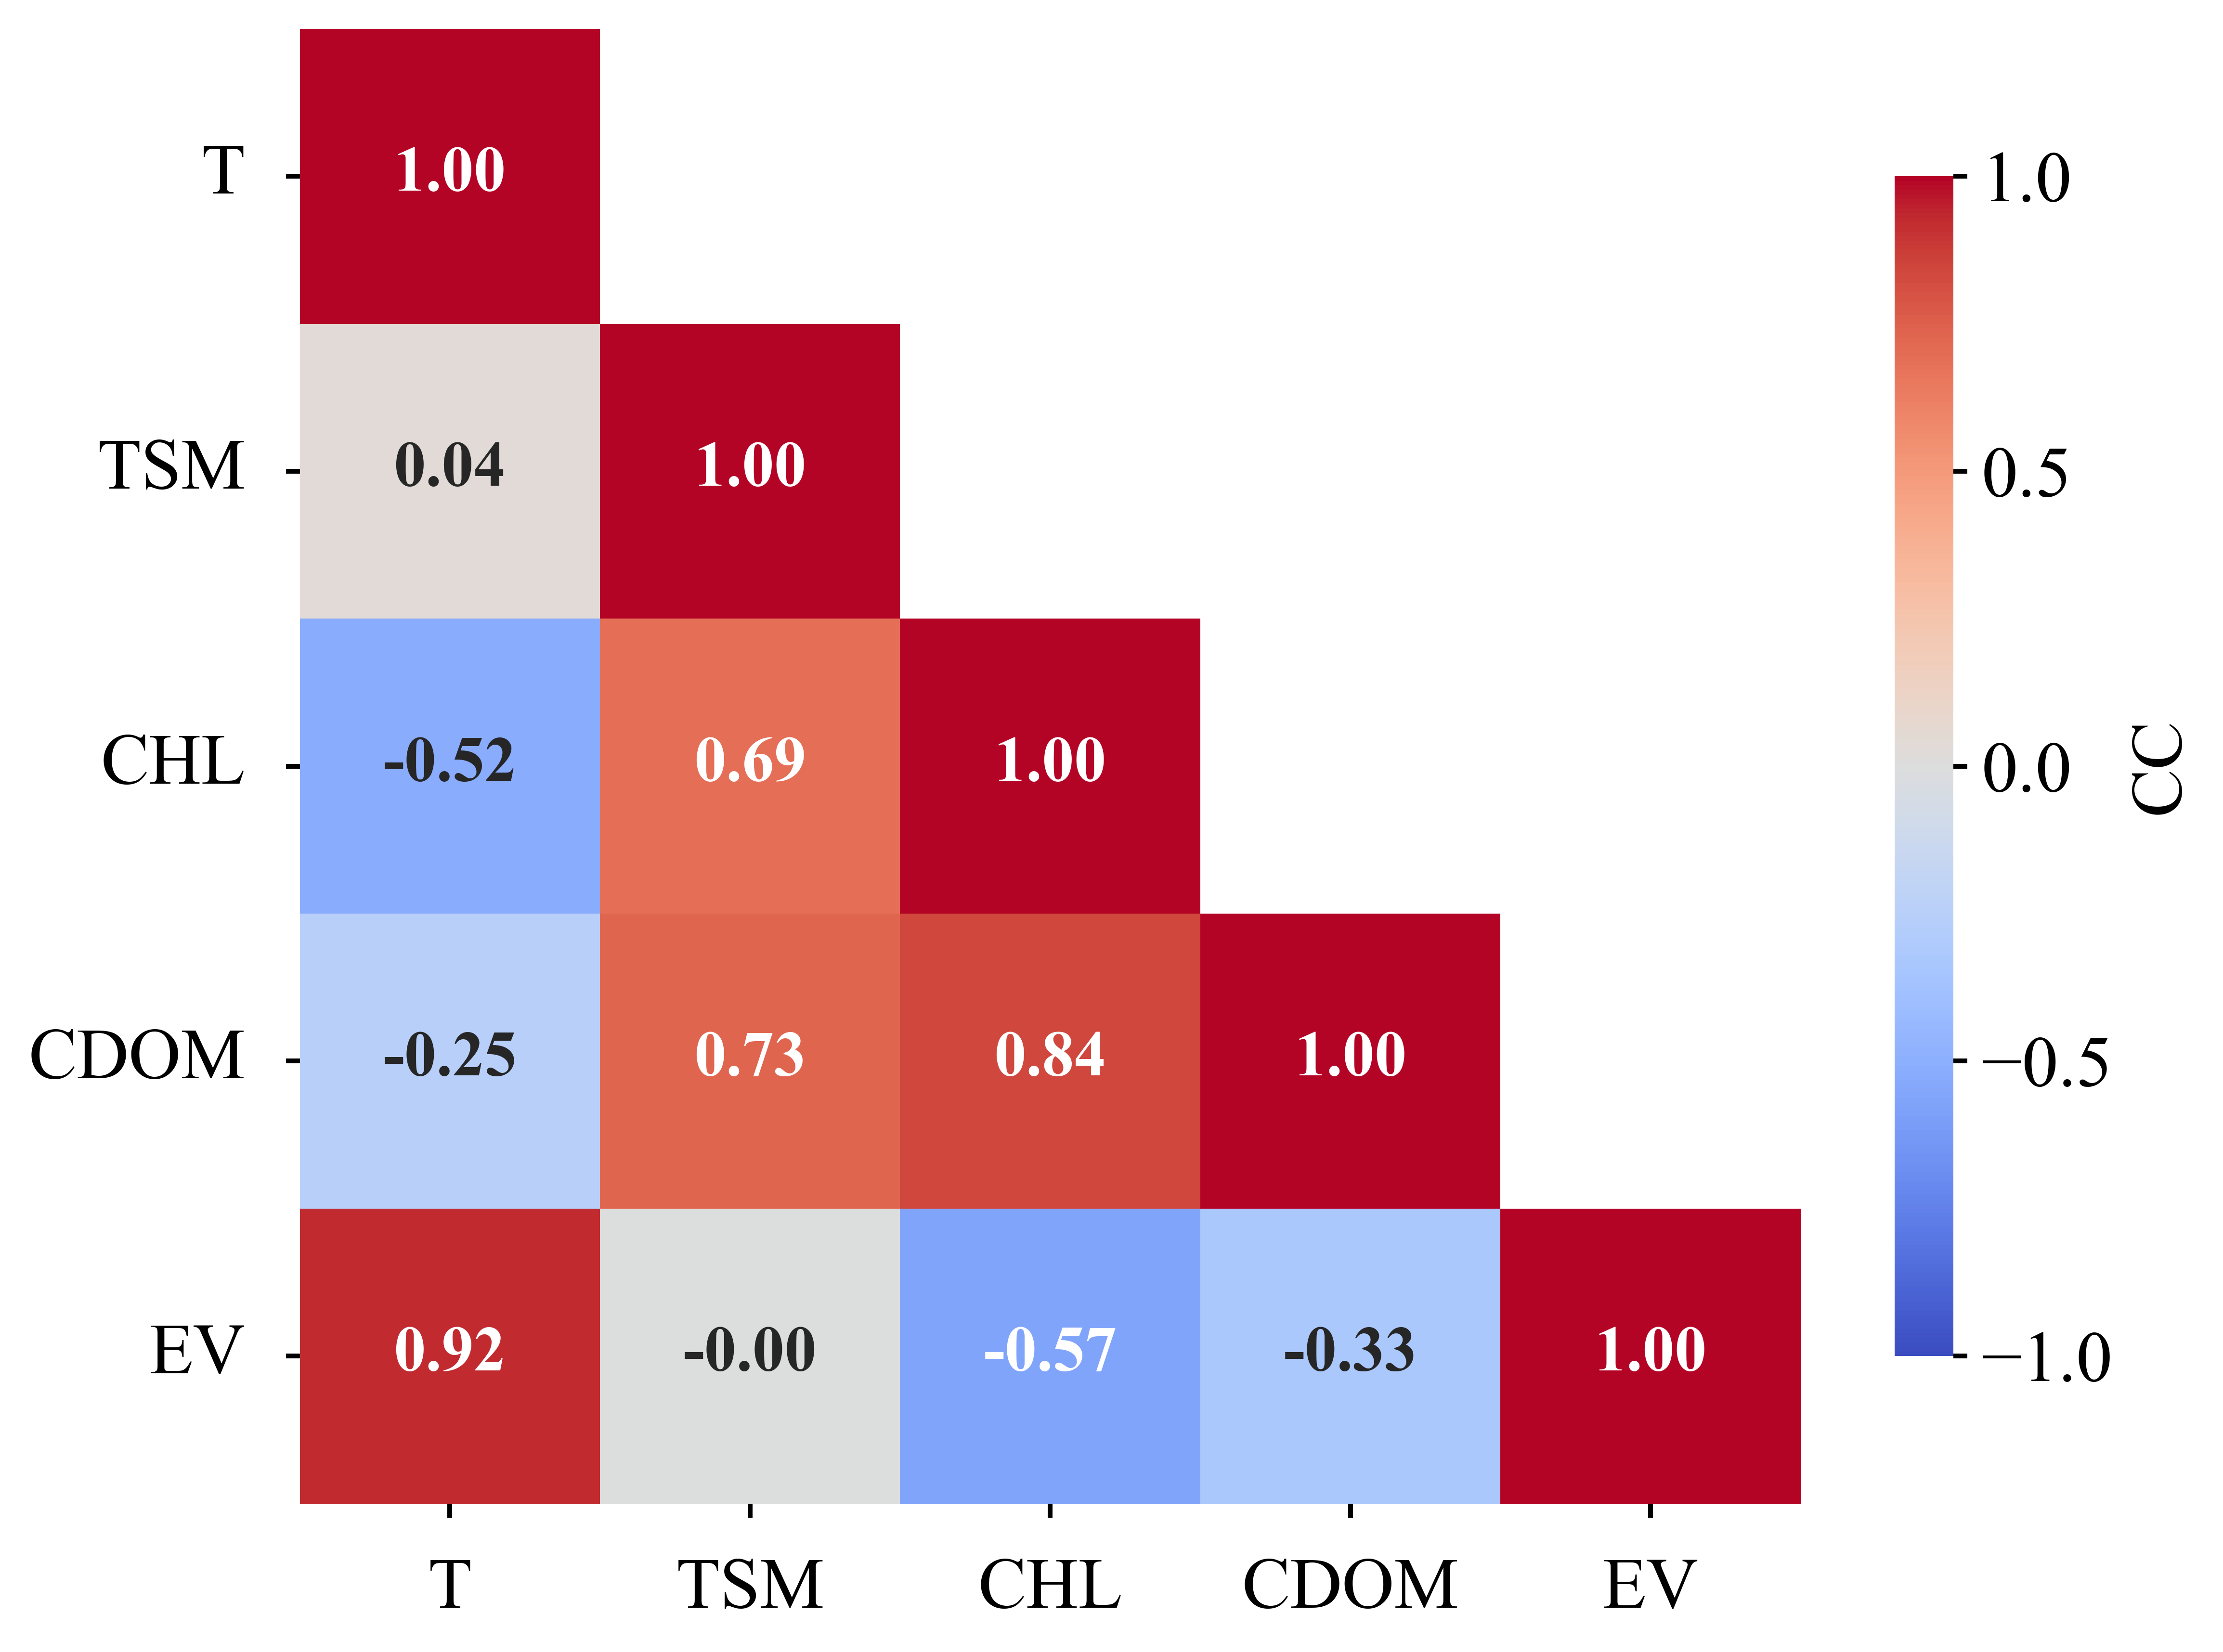

In [7]:
# Generate correlation heatmap for water quality data
correlation(wq, "waterquality")

## Meteorological Correlation
Generate and save a correlation heatmap for meteorological data.

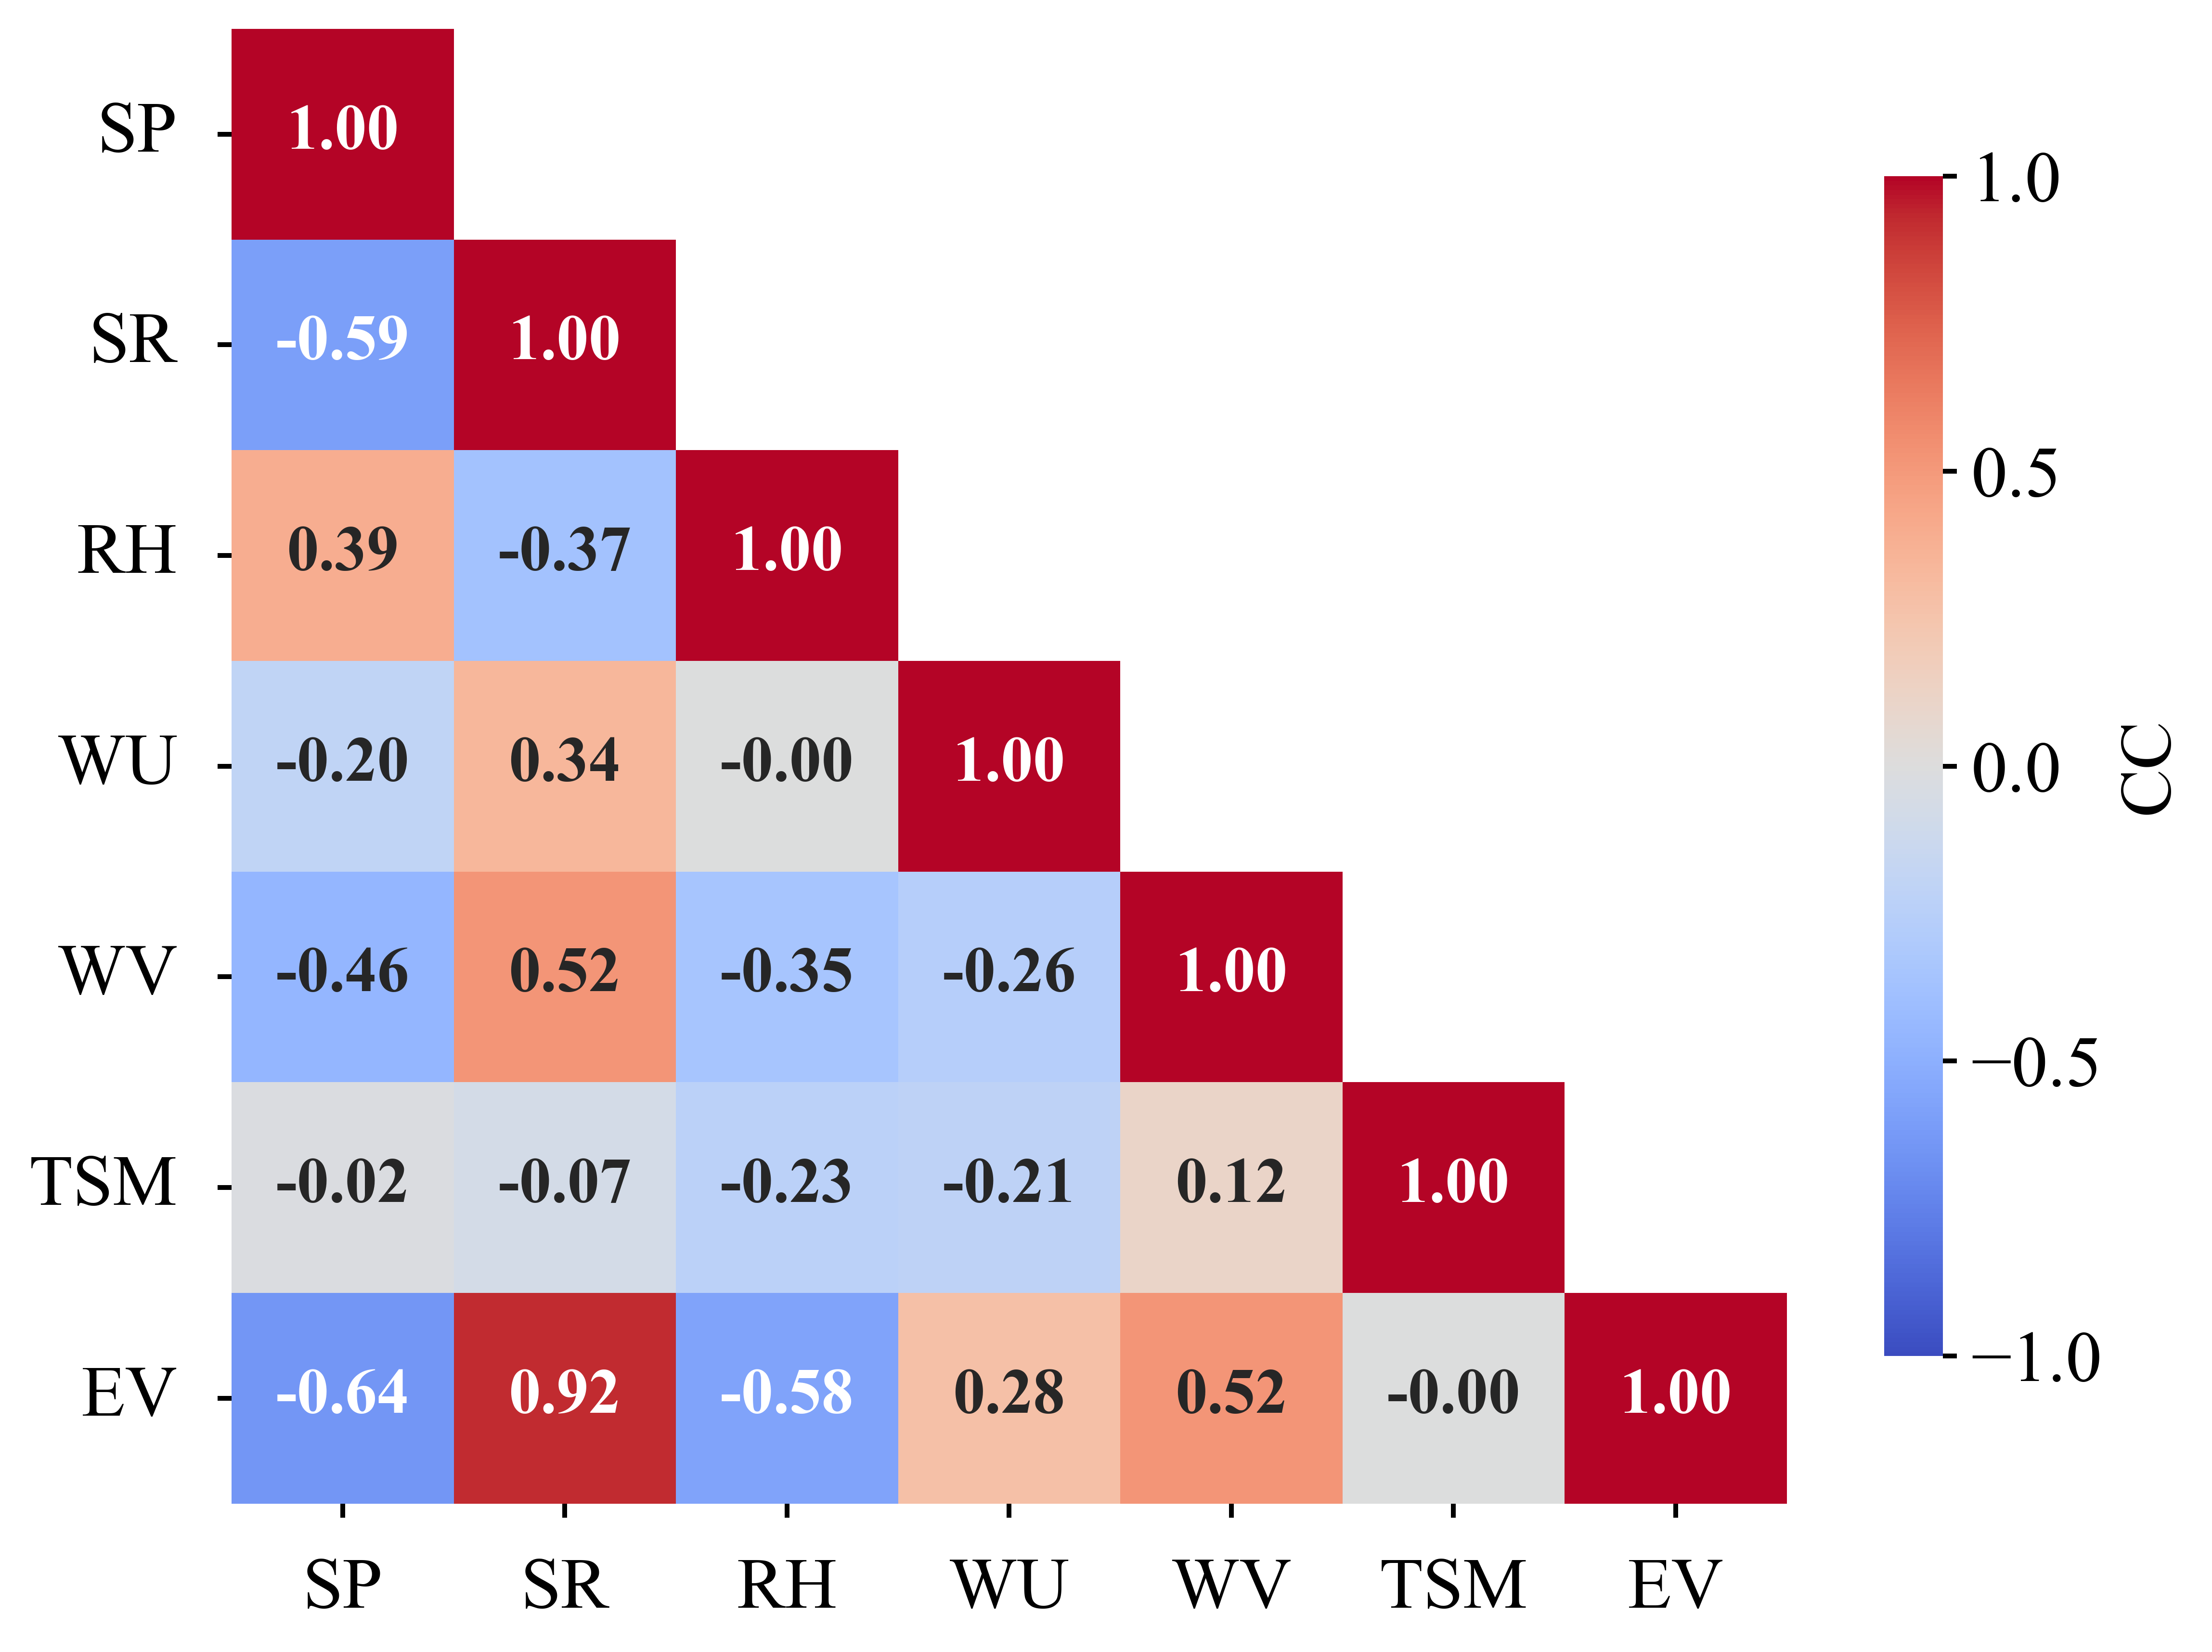

In [8]:
# Generate correlation heatmap for meteorological data
correlation(mg, "meteorological")

# Kernel Density Estimation Analysis
Analyze the relationship between water quality parameters and evaporation using kernel density estimation and regression.

In [9]:
# Rename water quality columns for better readability in plots
wq.rename(columns={'T': 'T (°C)',
                   'TSM': 'TSM (g/$m^{3}$)',
                   'CHL': 'CHL (mg/$m^{3}$)',
                   'CDOM': 'CDOM ($m^{-1}$)',
                   'EV': 'EV (mm/day)'}, inplace=True)

## Parameter Definitions
Define parameters for kernel density estimation plots, including their labels and correlation coefficients.

In [10]:
# Define parameters for plotting with their labels and correlation coefficients
parameters = [
    ('T (°C)', 0.92, 'Temperature'),
    ('TSM (g/$m^{3}$)', 0.04, 'Total Suspended Matter'),
    ('CHL (mg/$m^{3}$)', -0.52, 'Chlorophyll'),
    ('CDOM ($m^{-1}$)', -0.25, 'CDOM')
]

## Kernel Density Estimation Plotting Function
Define a function to create a grid of kernel density estimation and regression plots for water quality parameters.

In [11]:
def plot_params_grid(data, parameters):
    # Get the number of parameters to plot
    n = len(parameters)
    
    # Create a 2x2 subplot grid
    nrows, ncols = 2, 2
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 12), dpi=600)
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Iterate over parameters and corresponding axes
    for ax, (param, r2_value, label) in zip(axes, parameters):
        # Plot kernel density estimation (KDE) for the parameter vs. evaporation
        sns.kdeplot(ax=ax, x=data[param], y=data['EV (mm/day)'],
                    levels=5, color="crimson", alpha=1)
        # Overlay a regression plot with scatter points
        sns.regplot(ax=ax, x=data[param], y=data['EV (mm/day)'],
                    scatter=True, color="black", 
                    scatter_kws={'s': 80}, 
                    line_kws={'color': 'blue', 'label': 'Regression Line'}, 
                    truncate=False)

        # Set axis labels with appropriate units
        ax.set_xlabel(f'{param}', fontsize=20, labelpad=12)
        ax.set_ylabel('EV (mm/day)', fontsize=20, labelpad=12)

        # Ensure consistent y-axis limits and ticks
        ax.set_ylim(-2, 13)
        ax.set_yticks(np.arange(-0, 13, 2))

        # Add correlation coefficient annotation
        ax.text(0.65, 0.05, f"CC = {r2_value:.2f}", 
                transform=ax.transAxes, fontsize=22, color='black')

        # Set tick parameters for readability
        ax.tick_params(axis='both', which='major', labelsize=18)

        # Add legend only for the first plot (Temperature)
        if label == 'Temperature':
            custom_lines = [plt.Line2D([0], [0], color="crimson", lw=3), 
                            plt.Line2D([0], [0], color="blue", lw=3)]
            ax.legend(custom_lines, ['Kernel Density Estimation', 'Regression Line'], 
                      fontsize=20, loc='upper left')

    # Remove any unused subplots
    for ax in axes[n:]:
        ax.remove()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig(f"./../plots/kde-waterquality.png", dpi=600, bbox_inches='tight')
    # Display the plot
    plt.show()

## Generate KDE Plots
Create and save the kernel density estimation plots for water quality parameters.

In [12]:
# Generate and display the KDE and regression plots for water quality parameters
plot_params_grid(wq, parameters)